In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import shap


In [23]:
# Load datasets
df_train = pd.read_json('dataset\\for_modeling\\test.json')
df_val = pd.read_json('dataset\\for_modeling\\validation.json')
df_test = pd.read_json('dataset\\for_modeling\\test.json')

In [24]:
# Define the possible categories
categories = [
    'Generic policy', 'Reporting mechanism', 'Information on maintainer', 
    'Scope of practice', 'Projects practice', 'History of vulnerability', 
    'User guideline', 'Additional information',
]

for category in categories:
    df_train[category] = df_train['SecurityPolicy_content_category'].apply(lambda x: 1 if category in x else 0)
    df_val[category] = df_val['SecurityPolicy_content_category'].apply(lambda x: 1 if category in x else 0)
    df_test[category] = df_test['SecurityPolicy_content_category'].apply(lambda x: 1 if category in x else 0)



In [25]:
# Select features
selected_features = ['num_commits', 'project_age_days', 'num_contributors', 
                     'num_issues', 'num_pull', 'num_opening_issue', 'project_size(kB)', 
                     'num_stargazers', 'num_watchers', 'num_forks', 'num_subscribers']

X_train, y_train = df_train[selected_features], df_train['Generic policy']
X_val, y_val = df_val[selected_features], df_val['Generic policy']
X_test, y_test = df_test[selected_features], df_test['Generic policy']

In [26]:
# Encode target variables
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [27]:
# Train the model
clf = RandomForestClassifier(n_estimators=100, max_depth=None)
clf.fit(X_train, y_train)


RandomForestClassifier()

In [28]:
# Validate the model
y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')
print('Validation Report:')
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.73
Validation Report:
              precision    recall  f1-score   support

           0       0.44      0.29      0.35        14
           1       0.79      0.88      0.83        42

    accuracy                           0.73        56
   macro avg       0.62      0.58      0.59        56
weighted avg       0.70      0.73      0.71        56



In [29]:
# Test the model
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')
print('Test Report:')
print(classification_report(y_test, y_test_pred))

Test Accuracy: 1.00
Test Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        19

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [30]:
# Feature importance
feature_importances = clf.feature_importances_
feature_importance_dict = dict(zip(selected_features, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print('Sorted Feature Importance:')
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.4f}')

Sorted Feature Importance:
project_age_days: 0.1265
num_subscribers: 0.1243
num_opening_issue: 0.1175
num_pull: 0.1018
num_issues: 0.1018
num_stargazers: 0.0783
num_watchers: 0.0762
project_size(kB): 0.0751
num_contributors: 0.0724
num_commits: 0.0653
num_forks: 0.0609


  0%|          | 0/28 [00:00<?, ?it/s]

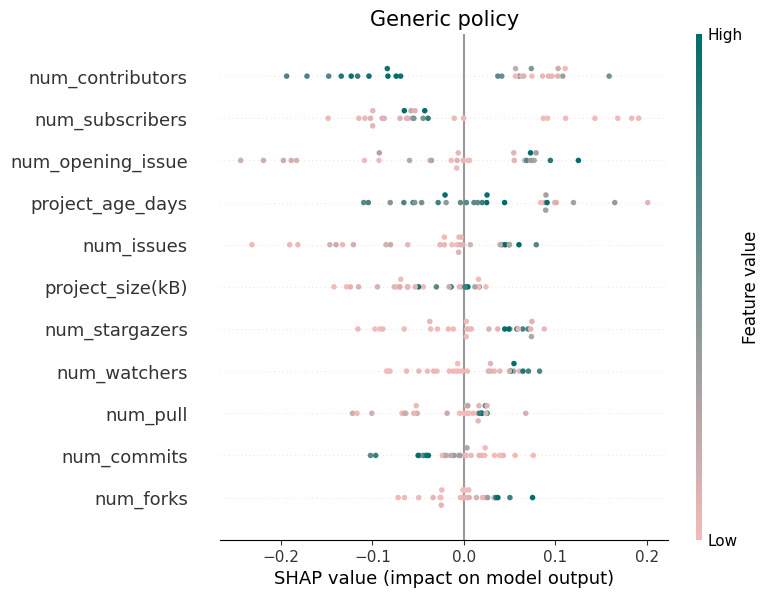

In [51]:
import shap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

# Calculate SHAP values
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10))
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
cmap = LinearSegmentedColormap.from_list("custom", ["#f3baba", "#006C6C"])
shap.summary_plot(shap_values, X_test, cmap=cmap, show=False)
plt.title("Generic policy", fontsize=15)

plt.show()